In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
steam_data = pd.read_csv('steamcharts.csv')

steam_data

,month,avg_players,gain,gain_percent,peak_players,name,steam_appid
0,Sep-25,7805.25,883.12,0.1276,13254,Counter-Strike,10
1,Aug-25,6922.13,-449.35,-0.0610,12168,Counter-Strike,10
2,Jul-25,7371.48,-833.5,-0.1016,13951,Counter-Strike,10
3,Jun-25,8204.98,-847.53,-0.0936,15798,Counter-Strike,10
4,May-25,9052.51,-471.31,-0.0495,15333,Counter-Strike,10
...,...,...,...,...,...,...,...
612260,Apr-25,2.48,-0.92,-0.2709,8,The Ditzy Demons Are in Love With Me,802870
612261,Mar-25,3.40,-0.19,-0.0532,11,The Ditzy Demons Are in Love With Me,802870
612262,Feb-25,3.59,-0.65,-0.1527,12,The Ditzy Demons Are in Love With Me,802870
612263,Jan-25,4.23,-0.53,-0.1119,11,The Ditzy Demons Are in Love With Me,802870


# 1. Data preparation

In [5]:
steam_data.isnull().sum()

month           0
avg_players     0
gain            0
gain_percent    0
peak_players    0
name            0
steam_appid     0
dtype: int64

#### No null values!

In [10]:
steam_data.duplicated().sum()

np.int64(0)

#### No duplicated rows!

In [15]:
# count of rows where avg_players value is negativ
(steam_data['avg_players'] < 0).sum()

np.int64(0)

In [16]:
# count of rows where peak_players value is negativ
(steam_data['peak_players'] < 0).sum()

np.int64(0)

In [18]:
# count of rows where avg_players is higher then peak value is negativ
(steam_data['peak_players'] < steam_data['avg_players']).sum()

np.int64(0)

In [22]:
# count of rows where gain_percent is lower than zero
(steam_data['gain_percent'] < -1).sum()

np.int64(0)

In [36]:
# count of rows where name is empty
(steam_data['name'].str.strip() == '').sum()

np.int64(0)

## No invalid values!

# 2. Analysis

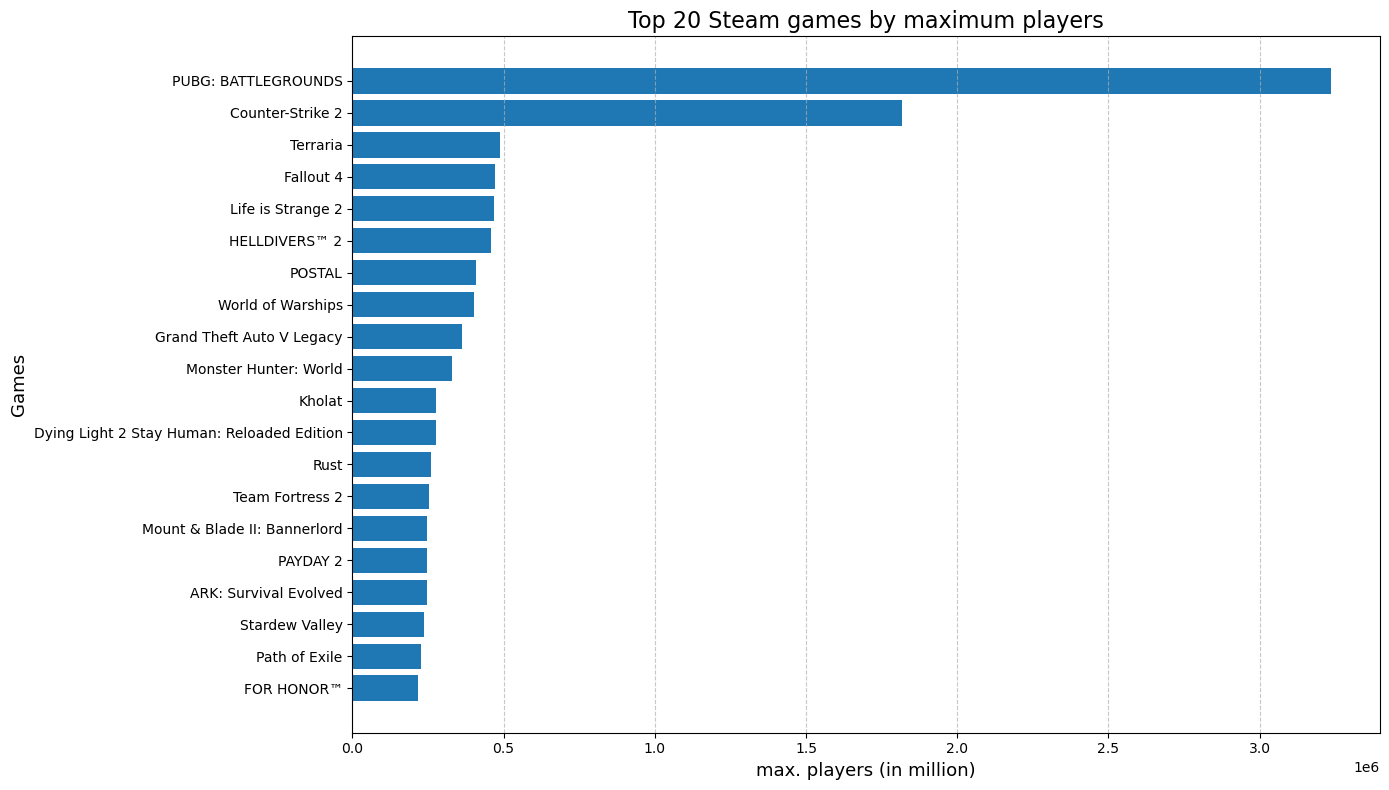

In [45]:
plt.figure(figsize=(14, 8))

plt.barh(
    top20_games['name'],
    top20_games['peak_players']
)

plt.xlabel('max. players (in million)', fontsize=13)
plt.ylabel('Games', fontsize=13)
plt.title('Top 20 Steam games by maximum players', fontsize=16)

# Highest value on top
plt.gca().invert_yaxis()

# Add grid for readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


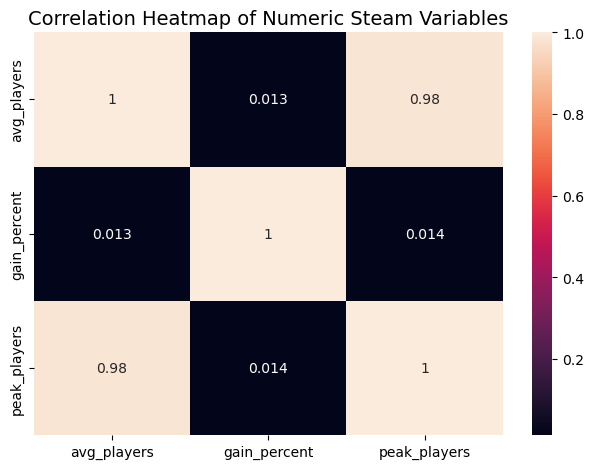

In [42]:
numeric_data = steam_data.select_dtypes(include='number')
numeric_data = numeric_data.drop(columns=['steam_appid'], errors='ignore')

sns.heatmap(
    numeric_data.corr(),
    annot=True,
)

plt.title('Correlation Heatmap of Numeric Steam Variables', fontsize=14)
plt.tight_layout()
plt.show()


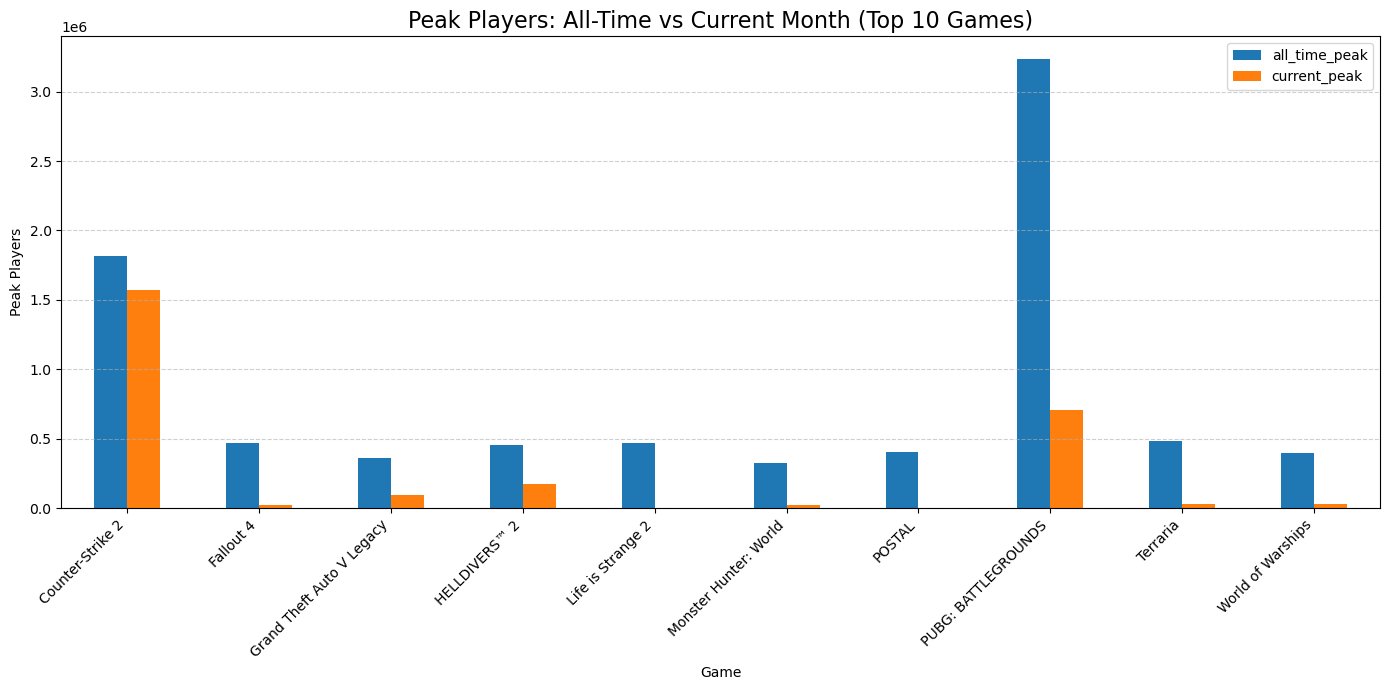

In [43]:

steam_data['month_dt'] = pd.to_datetime(
    steam_data['month'],
    format='%b-%y'
)

# Get Top 10 games by all-time peak players
top10_names = (
    steam_data
    .groupby('name')['peak_players']
    .max()
    .sort_values(ascending=False)
    .head(10)
    .index
)


latest_month = steam_data['month_dt'].max()

comparison = (
    steam_data[steam_data['name'].isin(top10_names)]
    .groupby('name')
    .agg(
        all_time_peak=('peak_players', 'max'),
        current_peak=('peak_players', lambda x: x[steam_data.loc[x.index, 'month_dt'] == latest_month].max())
    )
    .dropna()
)

comparison.plot(
    kind='bar',
    figsize=(14, 7)
)

plt.title('Peak Players: All-Time vs Current Month (Top 10 Games)', fontsize=16)
plt.ylabel('Peak Players')
plt.xlabel('Game')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


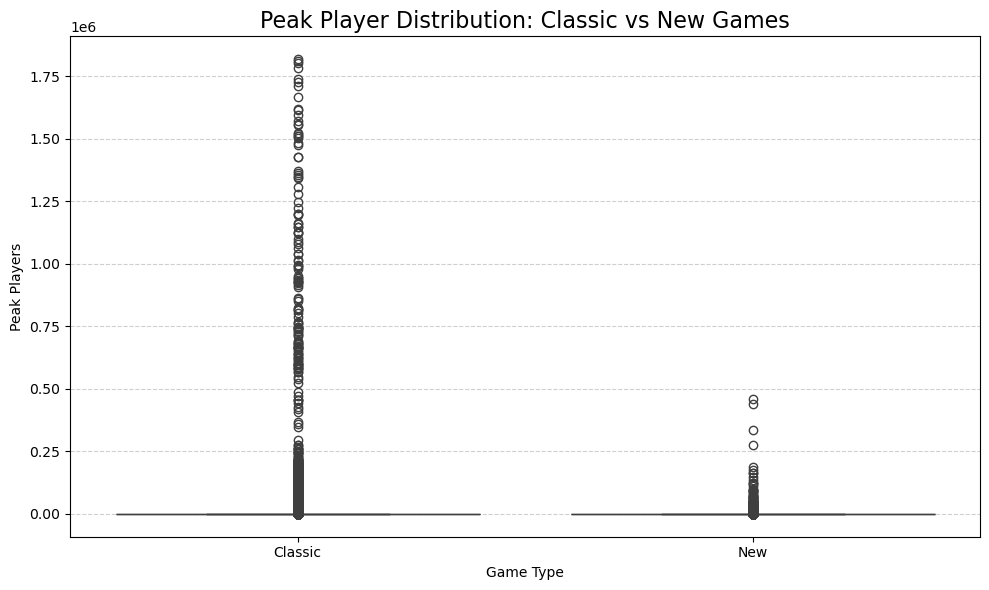

In [46]:
release_dates = (
    steam_data
    .groupby('name')['month_dt']
    .min()
    .reset_index(name='release_month')
)

steam_data = steam_data.merge(release_dates, on='name')

steam_data['game_type'] = np.where(
    steam_data['release_month'].dt.year <= 2015,
    'Classic',
    np.where(
        steam_data['release_month'].dt.year >= 2020,
        'New',
        'Middle'
    )
)

plt.figure(figsize=(10, 6))

sns.boxplot(
    data=steam_data[steam_data['game_type'].isin(['Classic', 'New'])],
    x='game_type',
    y='peak_players'
)

plt.title('Peak Player Distribution: Classic vs New Games', fontsize=16)
plt.xlabel('Game Type')
plt.ylabel('Peak Players')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
